In [2]:
import os
from tqdm import tqdm
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from natsort import natsorted
from scipy.signal import find_peaks
import time

In [3]:
image = cv2.imread("/home/dais01/Preprocess/data/Data/Raw_Data_png/202301/ALL/12.7/22I016-04-012/22I016-04-012-1st-1-(1)-2.png", 0)

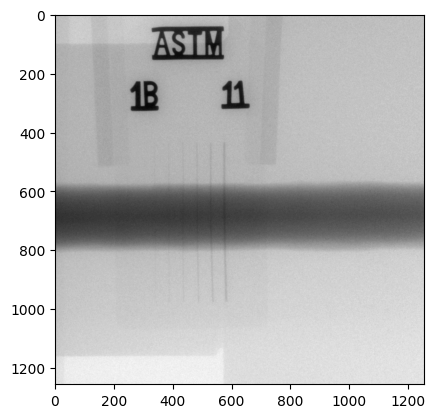

In [5]:
plt.figure()
plt.imshow(image, cmap='gray')

In [3]:
def check_IQI(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=21)
    kernel1 = np.ones((5,1), np.uint8)
    kernel2 = np.ones((1,5), np.uint8)


    # 그라디언트 크기 계산
    gradient_magnitude = np.sqrt(sobel_x ** 2 + sobel_x ** 2)

    # 경계를 0과 1로 이루어진 이진 마스크로 변환
    binary_mask = np.uint8(gradient_magnitude > np.percentile(gradient_magnitude, 93))

    #팽창
    binary_mask = cv2.dilate(binary_mask, kernel2, iterations=3)

    #특정 크기 이하의 덩어리를 제거
    contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) < 3000:
            cv2.drawContours(binary_mask, [cnt], -1, 0, -1)


    #침식
    binary_mask = cv2.erode(binary_mask, kernel2, iterations=3)
    binary_mask = cv2.erode(binary_mask, kernel1, iterations=1)

    #특정 크기 이하의 덩어리를 제거
    contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) < 1000:
            cv2.drawContours(binary_mask, [cnt], -1, 0, -1)

    binary_mask = cv2.dilate(binary_mask, kernel1, iterations=2)
    binary_mask = cv2.dilate(binary_mask, kernel2, iterations=2)

    contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)



In [15]:
def find_iqi(image_list):
    check_IQI_list = []
    found_iqi_break = False
    try:
        for i in range(len(image_list)):
            image = cv2.imread(image_list[i], cv2.IMREAD_GRAYSCALE)
            if check_IQI(image) <= 1:
                image = cv2.imread(image_list[i+1], cv2.IMREAD_GRAYSCALE)
                if check_IQI(image) <= 1:
                    check_IQI_list.append(i-1)
                    found_iqi_break = True
                    break
        if found_iqi_break:
            for i in range(len(image_list)-1, 0, -1):
                image = cv2.imread(image_list[i], cv2.IMREAD_GRAYSCALE)

                if check_IQI(image) <= 1:
                    image = cv2.imread(image_list[i-1], cv2.IMREAD_GRAYSCALE)
                    if check_IQI(image) <= 1:
                        check_IQI_list.append(i+1)
                        break
    except:
        print("Error in find_iqi")
    return check_IQI_list

  0%|          | 0/5 [00:00<?, ?it/s]

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H012-01-001
[1, 98]


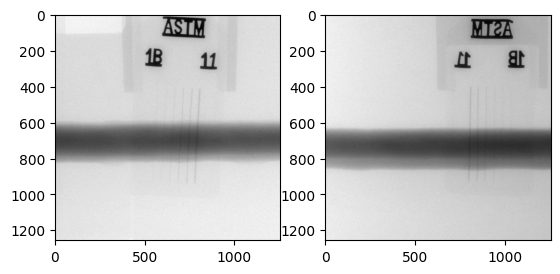

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-01-006
[1, 104]


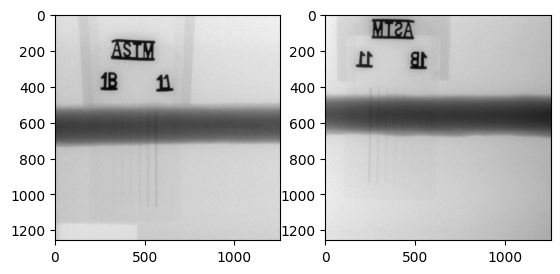

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H009-06-003
[1, 104]


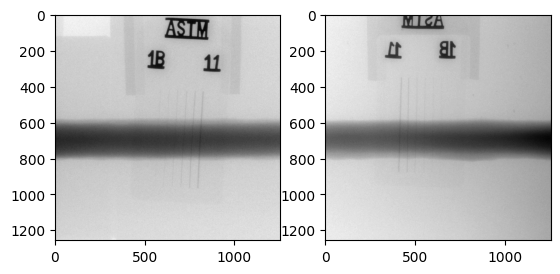

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H007-06-004
[1, 104]


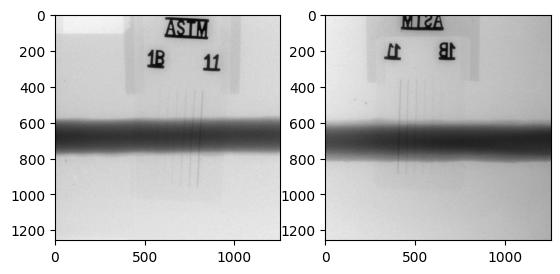

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22I006-02-001
[1, 100]


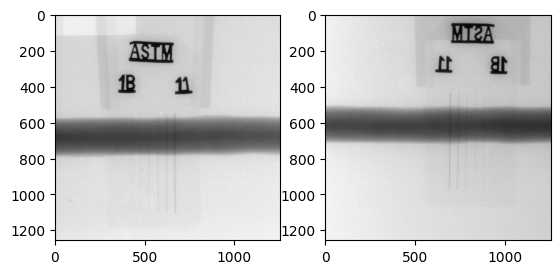

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H009-06-005
[1, 105]


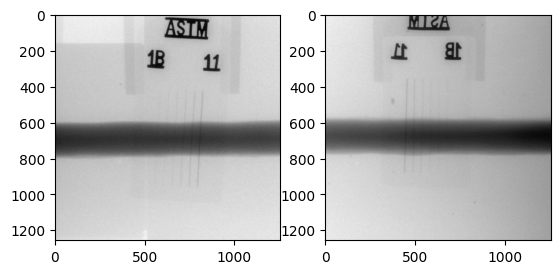

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H007-06-005
[1, 104]


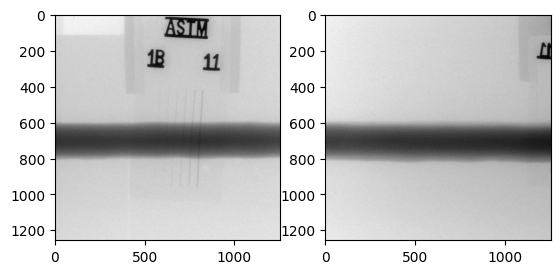

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-08-001
[1, 104]


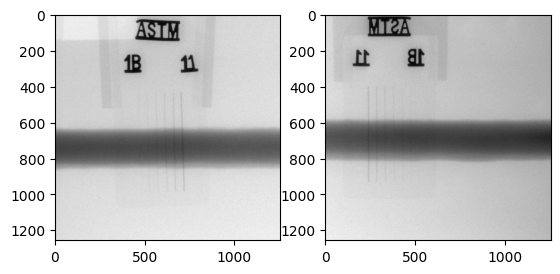

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-03-011
[1, 104]


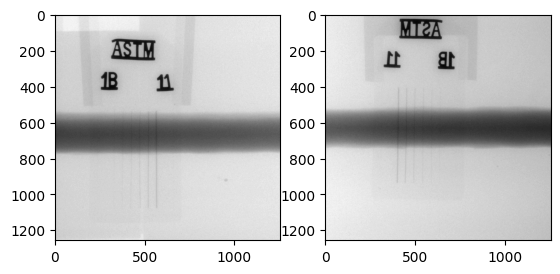

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H008-06-002
[1, 104]


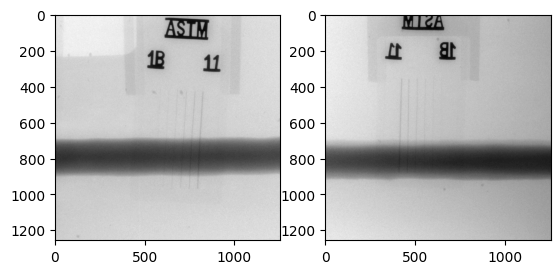

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-03-006
[1, 104]


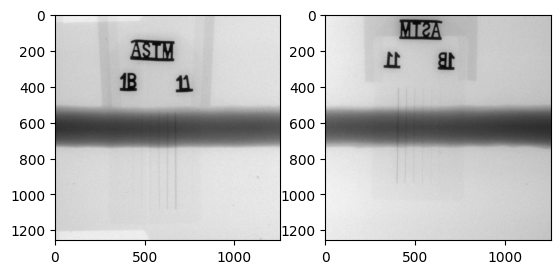

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-08-013
[1, 211]


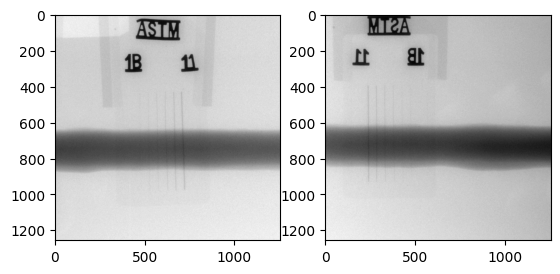

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-03-013
[1, 106]


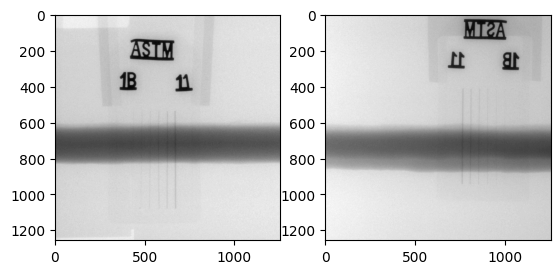

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G010-02-001
[1, 98]


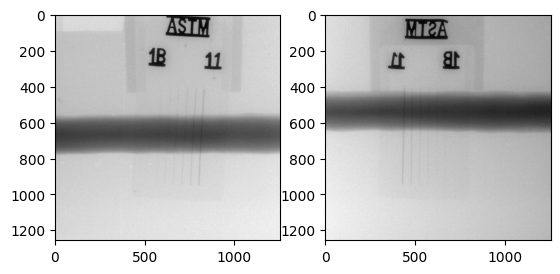

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-03-009
[1, 212]


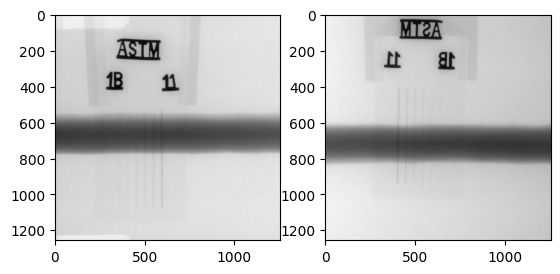

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G009-31-001
[1, 94]


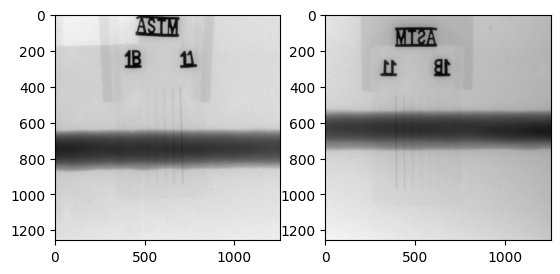

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-03-003
[1, 104]


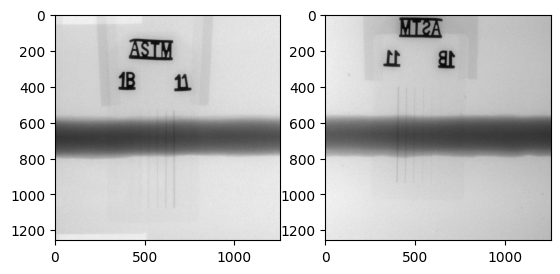

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H006-06-005
[1, 105]


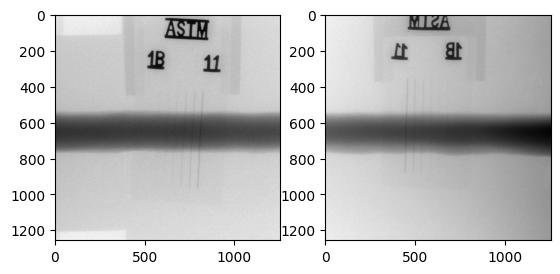

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-01-002
[1, 104]


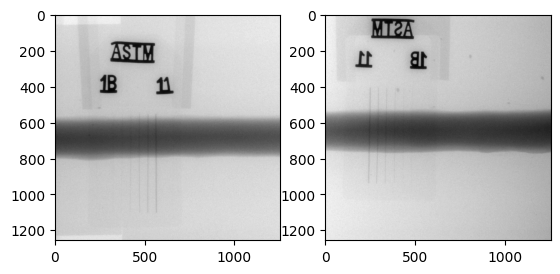

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G010-05-001
[1, 98]


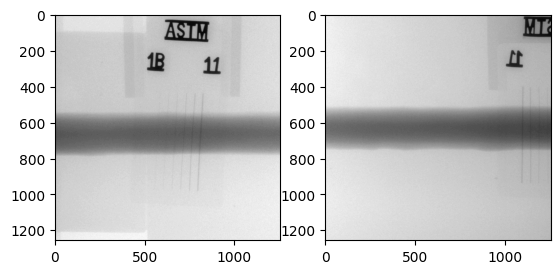

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H008-06-005
[1, 105]


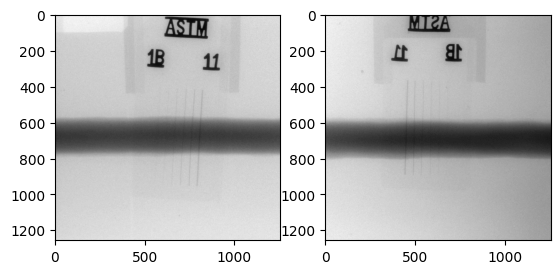

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-03-005
[1, 104]


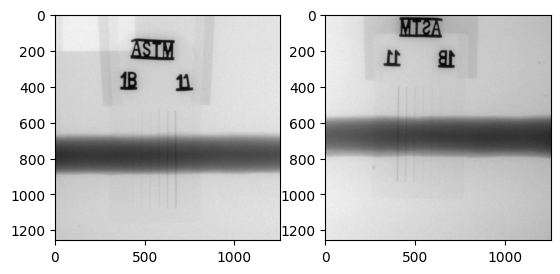

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H006-06-004
[1, 104]


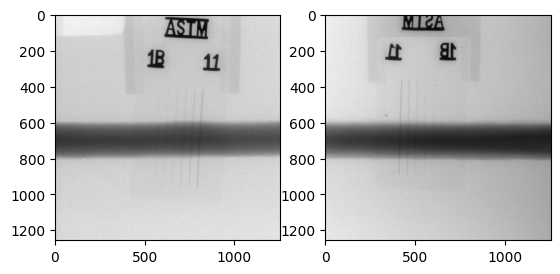

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22H006-06-001
[1, 104]


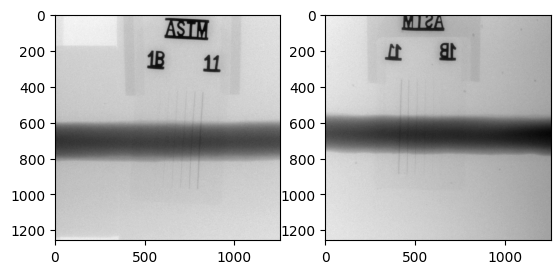

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-01-007
[1, 106]


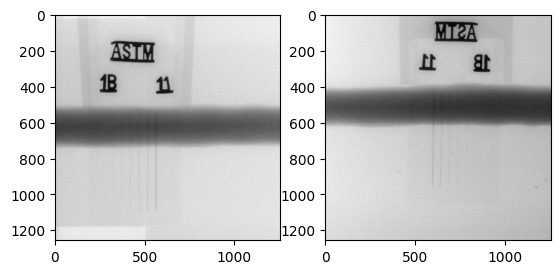

/home/dais01/Preprocess/data/Data/Raw_Data_png/202211/ALL/12.7/22G017-01-001


  0%|          | 0/5 [00:24<?, ?it/s]

Error in find_iqi
[1]


IndexError: list index out of range

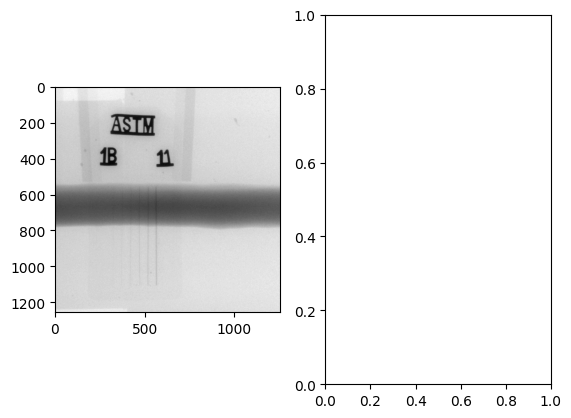

In [16]:
year_list = glob("/home/dais01/Preprocess/data/Data/Raw_Data_png/*")
for year in tqdm(year_list):
    thickness_list = glob(year + "/ALL/*")
    #under 15.88mm
    thickness_list = [thickness for thickness in thickness_list if float(thickness.split("/")[-1]) < 15.88]
    for thickness in thickness_list:
        pipe_list = glob(thickness + "/*")
        for pipe in tqdm(pipe_list):
            
            print(pipe)
            pipe_name = "-".join(pipe.split("/")[-1].split("-")[:3])
            image_list = glob(os.path.join(pipe, "*.png"))
            image_list = natsorted(image_list)
            check_IQI_list = find_iqi(image_list)
            print(check_IQI_list)
            plt.figure()
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.imread(image_list[check_IQI_list[0]], cv2.IMREAD_GRAYSCALE), cmap="gray")
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.imread(image_list[check_IQI_list[1]], cv2.IMREAD_GRAYSCALE), cmap="gray")
            plt.show()